# Chat
___

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import os
import sys
import datetime

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

## Chat Data
___

In [3]:
#chat dataframe
columns = ['datetime', 'username']
chat = pd.DataFrame({}, columns=columns)

#read chat files
exp = re.compile('\[(.+?)\] <(.+?)> (.+)?')
files = sorted(os.listdir(CHAT_DATA_DIRECTORY))
for filename in files:
    if filename.endswith('.txt'):
        filepath = os.path.join(CHAT_DATA_DIRECTORY, filename)
        dateStr = filename.rstrip('.txt')
        
        #read file
        openfile = open(filepath)
        rawData = openfile.read()
        openfile.close()

        #process each chat message
        splitRawData = rawData.split('\n')
        messages = []
        for line in splitRawData:
            match = exp.match(line)
            if match is not None:
                timeStr = match.group(1)
                datetimeStr = dateStr + ' ' + timeStr
                username = match.group(2)
                
                messages.append((datetimeStr, username))
        
        #create data frame and append data
        chat = chat.append(pd.DataFrame(messages, columns=columns))

#adjust data type
chat['datetime'] = pd.to_datetime(chat['datetime'], format='%Y-%m-%d %H:%M:%S')

#create additional columns
chat['day'] = chat['datetime'].dt.strftime('%Y-%m-%d')

#index
chat = chat.set_index(chat['datetime'])

#remove columns
chat = chat.drop('datetime', 1)

#sort
chat.sort_index(inplace=True)

In [4]:
chat.head()

,username,day
datetime,,
2015-08-05 02:00:09,tadloss,2015-08-05
2015-08-05 02:00:09,moobot,2015-08-05
2015-08-05 02:00:10,dersendeplan,2015-08-05
2015-08-05 02:00:17,dedalos_stormbring,2015-08-05
2015-08-05 02:00:18,unclesreefermadness,2015-08-05


In [5]:
chat.tail()

,username,day
datetime,,
2016-09-23 16:00:31,tobak1887,2016-09-23
2016-09-23 16:00:33,94schneemann,2016-09-23
2016-09-23 16:00:36,Zwieback_mit_Honig,2016-09-23
2016-09-23 16:00:37,+preysa,2016-09-23
2016-09-23 16:00:38,Thomas Stürmer,2016-09-23


In [7]:
#prepare chat data
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

chatMessages

,messages
day,
2015-08-05,74920
2015-08-06,59002
2015-08-07,71042
2015-08-08,64953
2015-08-09,30040
2015-08-10,19527
2015-08-11,32904
2015-08-12,35465
2015-08-13,35095


In [6]:
#prepare chat data
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

chatParticipants

,participants
day,
2015-08-05,8634
2015-08-06,6565
2015-08-07,6982
2015-08-08,6173
2015-08-09,3868
2015-08-10,2895
2015-08-11,4122
2015-08-12,4232
2015-08-13,3980


## Live Data
___

In [8]:
#live dataframe
columns = ['datetime', 'viewers']
live = pd.DataFrame({}, columns=columns)

#read live files
liveTmp = []
files = sorted(os.listdir(LIVE_DATA_DIRECTORY))
for filename in files:
    if filename.endswith('.csv'):
        filepath = os.path.join(LIVE_DATA_DIRECTORY, filename)
        
        #read file
        openfile = open(filepath)
        rawData = openfile.read()
        openfile.close()
        
        #process each datapoint
        splitRawData = rawData.split('\n')
        datapoints = []
        for line in splitRawData:
            split = line.split(',')
            if len(split) == 2:
                timestamp = split[0]
                viewers = int(split[1])
                datetimeObj = datetime.datetime.fromtimestamp(int(timestamp))
                datapoints.append((datetimeObj, viewers))
        
        live = live.append(pd.DataFrame(datapoints, columns=columns))

#sort data
live = live.sort_values(['datetime'], ascending=[True])

#create additional columns
live['day'] = live['datetime'].dt.strftime('%Y-%m-%d')

#index
live = live.set_index(live['datetime'])

#remove columns
live = live.drop('datetime', 1)

#sort
live.sort_index(inplace=True)

In [9]:
live.head()

,viewers,day
datetime,,
2015-01-15 18:37:02,757.0,2015-01-15
2015-01-15 18:37:47,757.0,2015-01-15
2015-01-15 18:37:50,757.0,2015-01-15
2015-01-15 18:37:52,757.0,2015-01-15
2015-01-15 18:37:54,757.0,2015-01-15


In [10]:
live.tail()

,viewers,day
datetime,,
2016-09-23 15:56:03,2350.0,2016-09-23
2016-09-23 15:57:03,2393.0,2016-09-23
2016-09-23 15:58:03,2428.0,2016-09-23
2016-09-23 15:59:03,2468.0,2016-09-23
2016-09-23 16:00:03,2544.0,2016-09-23


In [11]:
#prepare live data
liveFiltered = live

#group messages by date
liveGrouped = live.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: int(group['viewers'].mean()))
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

liveMean

,viewers
day,
2015-01-15,38891
2015-01-16,15431
2015-01-17,10516
2015-01-18,9268
2015-01-19,9235
2015-01-20,10525
2015-01-21,11974
2015-01-22,11230
2015-01-23,10393


## Comparison
___

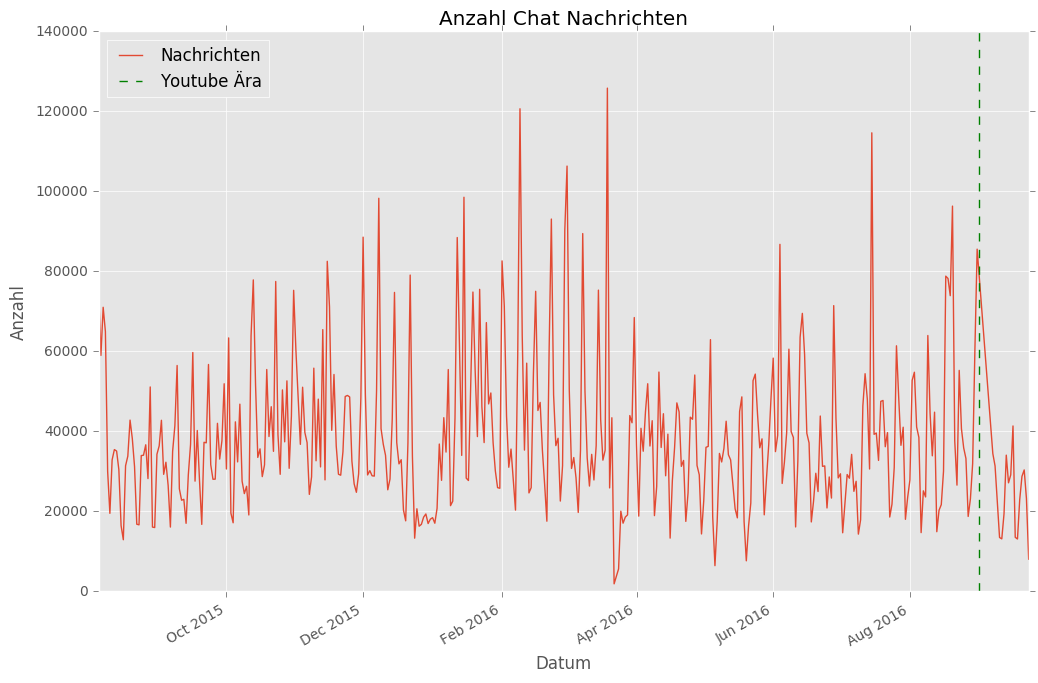

In [12]:
plot = chatMessages.plot(figsize=(12, 8), title='Anzahl Chat Nachrichten')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Nachrichten')

plt.ylim(ymin=0)

plot

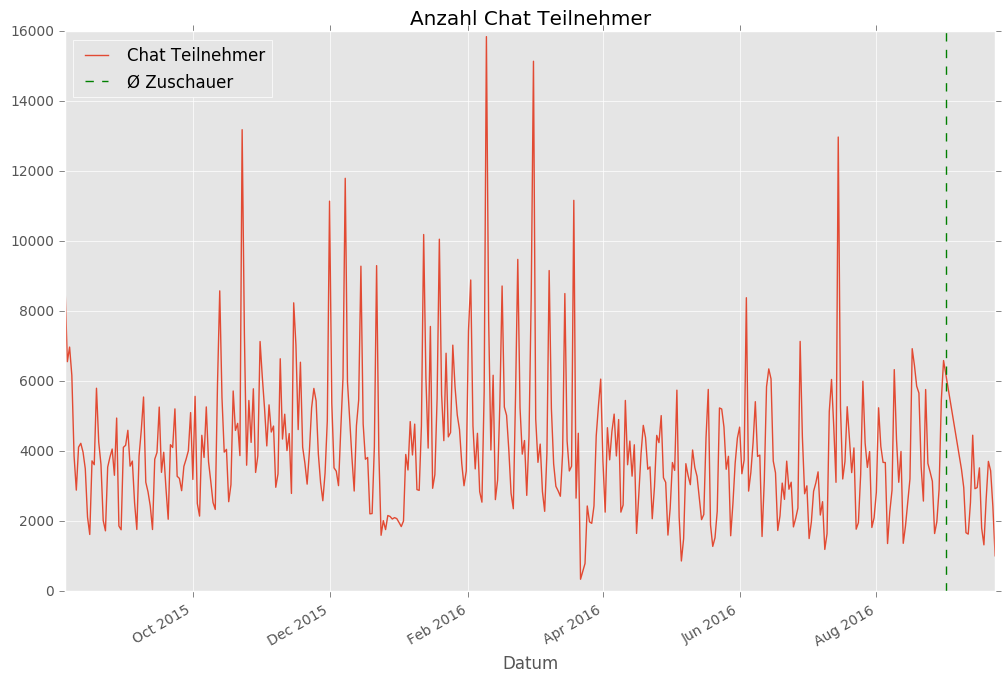

In [13]:
plot = chatParticipants.plot(kind='line', figsize=(12, 8), title='Anzahl Chat Teilnehmer')
plot.set_xlabel('Datum')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Chat Teilnehmer')
legend.get_texts()[1].set_text('Ø Zuschauer')

plt.ylim(ymin=0)

plot

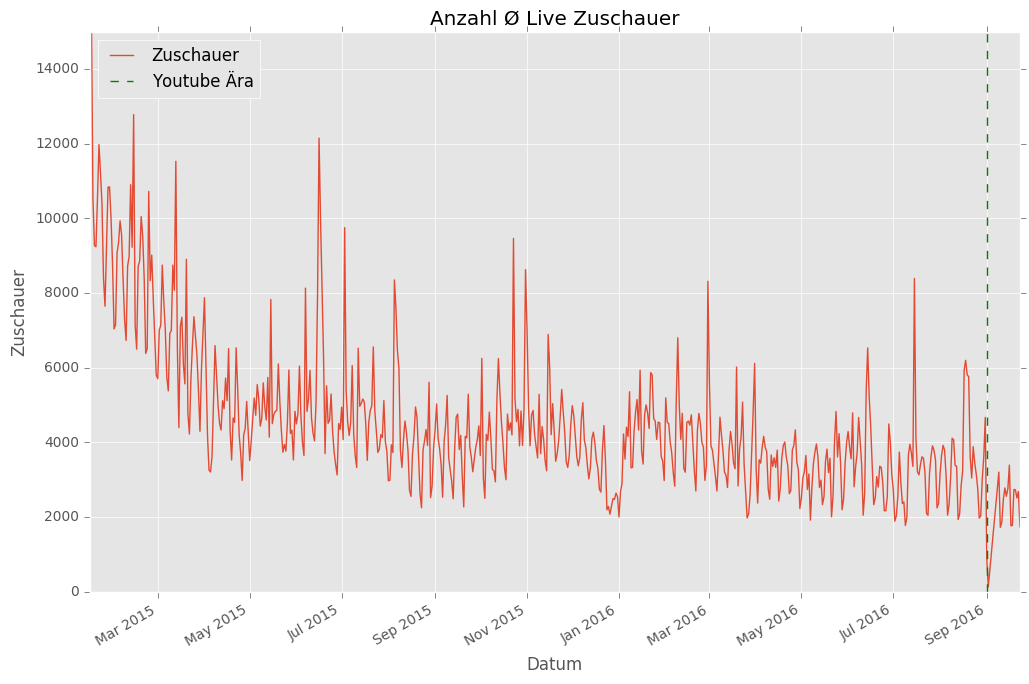

In [14]:
plot = liveMean.plot(figsize=(12, 8), title='Anzahl Ø Live Zuschauer')
plot.set_xlabel('Datum')
plot.set_ylabel('Zuschauer')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Zuschauer')

plt.ylim(ymin=0)
plt.ylim(ymax=15000)

plot

In [15]:
#join data
joinedData = chatParticipants.join(liveMean)

#participants/viewers ratio
joinedData['ratio'] = joinedData['viewers'] / joinedData['participants']

#remove last day
joinedData = joinedData.ix[:-1]

joinedData

,participants,viewers,ratio
day,,,
2015-08-05,8634,8348.0,0.966875
2015-08-06,6565,7601.0,1.157807
2015-08-07,6982,6456.0,0.924663
2015-08-08,6173,5984.0,0.969383
2015-08-09,3868,3779.0,0.976991
2015-08-10,2895,3324.0,1.148187
2015-08-11,4122,4058.0,0.984474
2015-08-12,4232,4569.0,1.079631
2015-08-13,3980,4245.0,1.066583


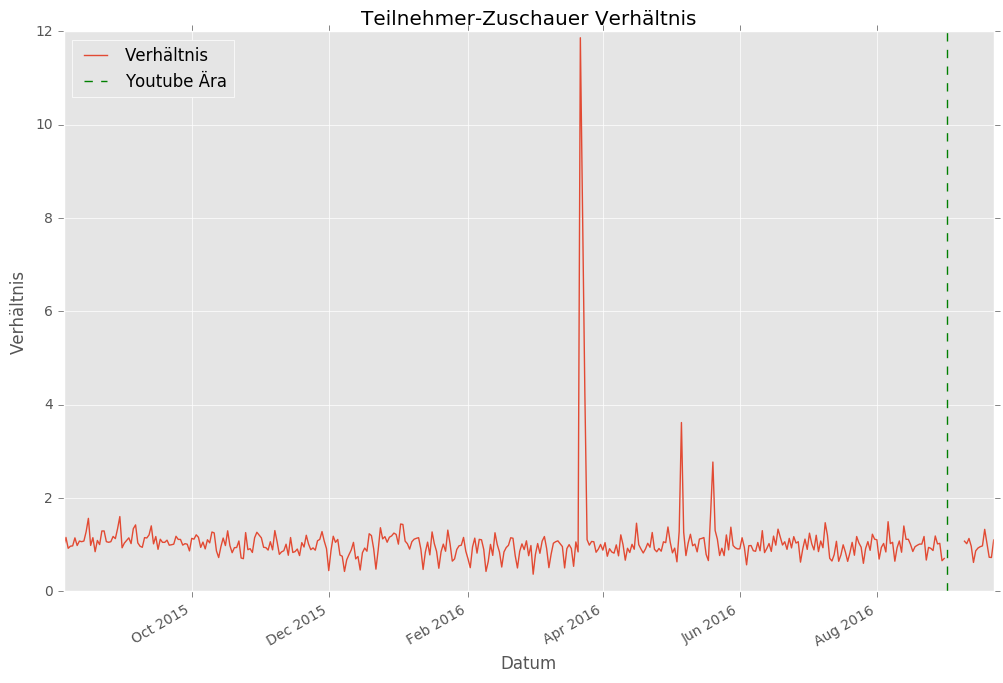

In [16]:
plot = joinedData['ratio'].plot(figsize=(12, 8), title='Teilnehmer-Zuschauer Verhältnis')
plot.set_xlabel('Datum')
plot.set_ylabel('Verhältnis')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Verhältnis')

plt.ylim(ymin=0)

plot